In [1]:
import svm_gui as sv
from __future__ import division

print (__doc__)
import matplotlib 
matplotlib.use('TkAgg')

from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.backends.backend_tkagg import NavigationToolbar2TkAgg
from matplotlib.figure import Figure
from matplotlib.contour import ContourSet

import tkinter as Tk
import sys
import numpy as np

from sklearn import svm
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)


Libsvm GUI

A simple graphical frontend for Libsvm mainly intended for didactic
purposes. You can create data points by point and click and visualize
the decision region induced by different kernels and parameter settings.

To create positive examples click the left mouse button; to create
negative examples click the right button.

If all examples are from the same class, it uses a one-class SVM.


Automatically created module for IPython interactive environment


## Question 1

In [34]:
# %run svmgui.py

Après quelques tests, on remarque que le noyau linéaire est efficace pour des données linéairement séparables et que le noyau gaussien est efficace pour des données unimodales. Quant au noyau polynomial, il donne des résultats variables et s'ajuste plus difficilement.

Si on s'intéresse plus particulièrement à des données unimodales, on observe :

- cas séparable : 
    
    - noyau linéaire : seule une valeur très faible de C semble avoir un impact sur le classifieur (à partir de 
C = 0.001)
    
    - noyau gaussien : les variations de gamma influencent grandement le classifieur (marge et frontière).
Quand gamma augmente, on observe une frontière repliée sur les données.  Quand gamma diminue, on observe une marge plus importante. Dans le cas sans recouvrement, un gamma faible convient.
    
- cas avec recouvrement : 

    - noyau linéaire : C a toujours une faible influence. 
    
    - noyau gaussien : bien choisir gamma est important ici. S'il est trop faible, la frontière ne tiendra plus compte des données tandis que s'il est trop important, on a un risque de surapprentissage.



## Question 2

In [35]:
#%run svmgui.py

Les trois zone d'intérêt sont : 
    - Zone 1 : la zone qui contient des points blancs (classe 1)
    - Zone 2 : la zone qui contient des points noirs (classe 2)
    - Zone 3 : la zone située entre les deux marges

Ajouter un point d'une même classe dans les zones 1 ou 2 ne modifie pas la frontière. La variable duale associée est nulle.

Ajouter un point d'une classe différente dans les zones 1 ou 2 déplace la frontière. La variable duale associée est d'autant plus grande que le point est éloigné de sa zone.

Ajouter un point dans la zone de marge déplace également la frontière. La variable duale associée est d'autant plus grande que le point est éloigné de sa zone.

## Question 3

In [36]:
#%run svmgui.py

Lorsque la valeur de C devient très faible, la frontière ne sépare plus les deux classes. C'est flagrant lorsque C devient plus faible que 0.0008.

## Question 4

In [37]:
from sklearn import datasets
import matplotlib.pyplot as plt
from utils import (rand_gauss, rand_bi_gauss, rand_tri_gauss,
                           rand_checkers, rand_clown, plot_2d,
                           frontiere)
import utils as u 
from sklearn.cross_validation import cross_val_score

%matplotlib inline

In [38]:
clf = datasets.load_iris()

lin_clf = svm.SVC(kernel='linear',degree=2)
lin_clf.fit(clf.data[50:,:2],clf.target[50:])

print clf.target
#Afin de ne conserver que les classes 1 et 2, on ne va pas conserver les 50 premieres colonnes

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


0.72999999999999998

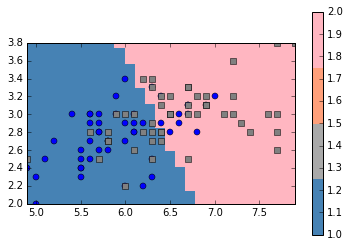

In [39]:
plt.show()
plt.close("all")
u.plot_2d(clf.data[50:, :2], clf.target[50:], w=None)
u.frontiere(lin_clf.predict, clf.data[:,:2], step=50)
lin_clf.score(clf.data[50:, :2],clf.target[50:])

## Question 5

In [40]:
clf.data.shape

(150, 4)

In [41]:
from sklearn.utils import shuffle
# On shuffle pour mélanger les classes 1 et 2 avant de séparer en un set d'apprentissage et un de validation
X,y = shuffle(clf.data[50:,:2],clf.target[50:],random_state=0)

lin_clf2 = svm.SVC(kernel='linear',C=1.,degree=2)
lin_clf2.fit(X[:50,:2],y[:50])
scoresLin = cross_val_score(lin_clf2, X[50:,:2],y[50:], cv=5)
print scoresLin

pol_clf = svm.SVC(kernel='poly',degree=3)
pol_clf.fit(X[:50,:2],y[:50])
scoresPol = cross_val_score(pol_clf, X[50:,:2],y[50:], cv=5)
print scoresPol

[ 0.81818182  0.9         0.7         0.7         0.66666667]
[ 0.81818182  0.9         0.6         0.6         0.77777778]


In [42]:
print np.mean(scoresLin)
print np.mean(scoresPol)

0.75696969697
0.739191919192


## Question 6


Faces recognition example using SVMs and custom kernels

The dataset used in this example is a preprocessed excerpt 
of the "Labeled Faces in the Wild", aka LFW_:

  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz (233MB)

  _LFW: http://vis-www.cs.umass.edu/lfw/


The best parameters are {'C': 1.0, 'gamma': 0.00390625} with a score of 0.51


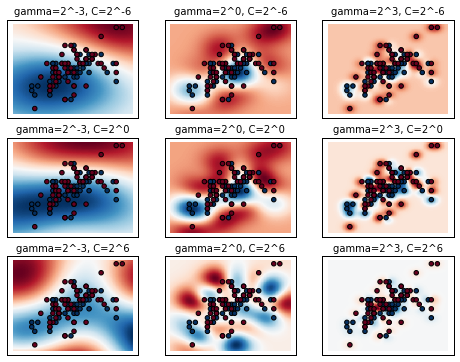

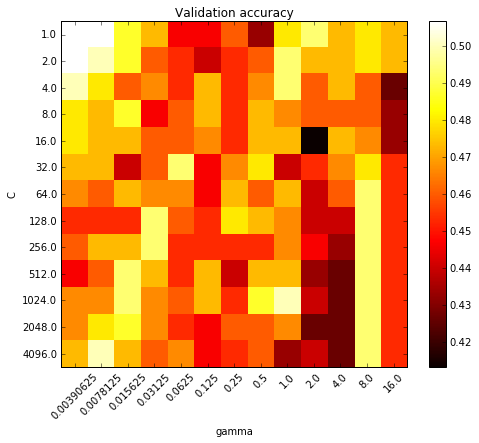

In [43]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.grid_search import GridSearchCV


scaler = StandardScaler()
X = scaler.fit_transform(X)
y = clf.target[50:]
##############################################################################
# Train classifiers
#
# For an initial search, a logarithmic grid with basis
# 10 is often helpful. Using a basis of 2, a finer
# tuning can be achieved but at a much higher cost.

C_range = np.logspace(0, 12, 13, base=2)
gamma_range = np.logspace(-8, 4, 13, base=2)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(y, n_iter=5, test_size=0.3, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

# Now we need to fit a classifier for all parameters in the 2d version
# (we use a smaller set of parameters here because it takes a while to train)

C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X, y)
        classifiers.append((C, gamma, clf))

##############################################################################
# visualization
#
# draw visualization of parameter effects

plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
for (k, (C, gamma, clf)) in enumerate(classifiers):
    # evaluate decision function in a grid
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # visualize decision function for these parameters
    plt.subplot(len(C_2d_range), len(gamma_2d_range), k + 1)
    plt.title("gamma=2^%d, C=2^%d" % (np.log2(gamma), np.log2(C)),
              size='medium')

    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu_r)
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')

# plot the scores of the grid
# grid_scores_ contains parameter settings and scores
# We extract just the scores
scores = [x[1] for x in grid.grid_scores_]
scores = np.array(scores).reshape(len(C_range), len(gamma_range))

# Draw heatmap of the validation accuracy as a function of gamma and C
#
# The score are encoded as colors with the hot colormap which varies from dark
# red to bright yellow. As the most interesting scores are all located in the
# 0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
# as to make it easier to visualize the small variations of score values in the
# interesting range while not brutally collapsing all the low score values to
# the same color.

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()

## Question 7

Fitting the classifier to the training set
Predicting the people names on the testing set
done in 0.422s
Chance level : 0.621052631579
Accuracy : 0.6
Fitting the classifier to the training set
Predicting the people names on the testing set
done in 0.473s
Chance level : 0.621052631579
Accuracy : 0.6
Fitting the classifier to the training set
Predicting the people names on the testing set
done in 0.309s
Chance level : 0.621052631579
Accuracy : 0.889473684211
Fitting the classifier to the training set
Predicting the people names on the testing set
done in 0.276s
Chance level : 0.621052631579
Accuracy : 0.921052631579
Fitting the classifier to the training set
Predicting the people names on the testing set
done in 0.263s
Chance level : 0.621052631579
Accuracy : 0.921052631579
Fitting the classifier to the training set
Predicting the people names on the testing set
done in 0.283s
Chance level : 0.621052631579
Accuracy : 0.921052631579
Fitting the classifier to the training set
Predicting th

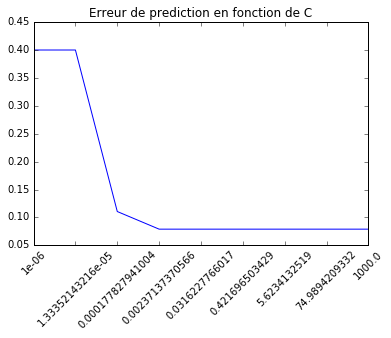

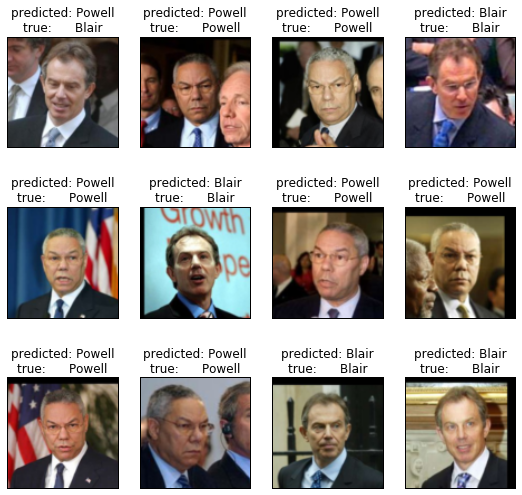

In [44]:
"""
=======================================================
Faces recognition example using SVMs and custom kernels
=======================================================

The dataset used in this example is a preprocessed excerpt 
of the "Labeled Faces in the Wild", aka LFW_:

  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz (233MB)

  _LFW: http://vis-www.cs.umass.edu/lfw/

"""
%matplotlib inline
import numpy as np
from time import time
import pylab as pl

from sklearn.cross_validation import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.svm import SVC
from svmlfw import (plot_gallery,title)
####################################################################
# Download the data (if not already on disk); load it as numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4,
                              color=True, funneled=False, slice_=None, 
                              download_if_missing =False)

# introspect the images arrays to find the shapes (for plotting)
images = lfw_people.images / 255.
n_samples, h, w, n_colors = images.shape

# the label to predict is the id of the person
target_names = lfw_people.target_names.tolist()

####################################################################
# Pick a pair to classify such as
names = ['Tony Blair', 'Colin Powell']
#names = ['Donald Rumsfeld', 'Colin Powell']

idx0 = (lfw_people.target == target_names.index(names[0]))
idx1 = (lfw_people.target == target_names.index(names[1]))
images = np.r_[images[idx0], images[idx1]]
n_samples = images.shape[0]
y = np.r_[np.zeros(np.sum(idx0)), np.ones(np.sum(idx1))].astype(np.int)

####################################################################
# Extract features

# features using only illuminations
X = (np.mean(images, axis=3)).reshape(n_samples, -1)

# # or compute features using colors (3 times more features)
# X = images.copy().reshape(n_samples, -1)

# Scale features
X -= np.mean(X, axis=0)
X /= np.std(X, axis=0)

####################################################################
# Split data into a half training and half test set
#X_train, X_test, y_train, y_test, images_train, images_test = \
#    train_test_split(X, y, images, test_size=0.5, random_state=0)
#X_train, X_test, y_train, y_test = \
#    train_test_split(X, y, test_size=0.5, random_state=0)

indices = np.random.permutation(X.shape[0])
train_idx, test_idx = indices[:X.shape[0]/2], indices[X.shape[0]/2:]
X_train, X_test = X[train_idx,:], X[test_idx,:]
y_train, y_test = y[train_idx], y[test_idx]
images_train, images_test = images[train_idx,:,:,:], images[test_idx,:,:,:]

####################################################################


C_log = np.logspace(-6, 3, 9)
diff = np.zeros(9)
for i in range(len(C_log)) :
    print "Fitting the classifier to the training set"
    t0 = time()
    clf2 = SVC(kernel='linear', C=C_log[i])
    clf2 = clf2.fit(X_train, y_train)
    
    print "Predicting the people names on the testing set"
    t0 = time()
    y_pred = clf2.predict(X_test)

    print "done in %0.3fs" % (time() - t0)
    print "Chance level : %s" % max(np.mean(y), 1. - np.mean(y))
    print "Accuracy : %s" % clf2.score(X_test, y_test)
    
    diff[i] = 1-clf2.score(X_test, y_test)

plt.plot(np.linspace(0,8,9),diff)
plt.xticks(np.arange(len(C_log)), C_log, rotation=45)
plt.title("Erreur de prediction en fonction de C")

####################################################################
# Qualitative evaluation of the predictions using matplotlib

def plot_gallery(images, titles, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    pl.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    pl.subplots_adjust(bottom=0, left=.01, right=.99, top=.90,
                       hspace=.35)
    for i in range(n_row * n_col):
        pl.subplot(n_row, n_col, i + 1)
        pl.imshow(images[i])
        pl.title(titles[i], size=12)
        pl.xticks(())
        pl.yticks(())

def title(y_pred, y_test, names):
    pred_name = names[int(y_pred)].rsplit(' ', 1)[-1]
    true_name = names[int(y_test)].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred[i], y_test[i], names)
                     for i in range(y_pred.shape[0])]
plot_gallery(images_test, prediction_titles)
pl.show()



## Question 8

Le centrage des données permet de mettre la moyenne à 0,
X = X - np.mean(X, axis=0)

La normalisation permet de mettre la variance à 1,
X = X / np.std(X, axis=0)

Cette opération permet de traiter les données de manière cohérente.
Toutes les données auront de ce fait la même échelle.

## Question 9

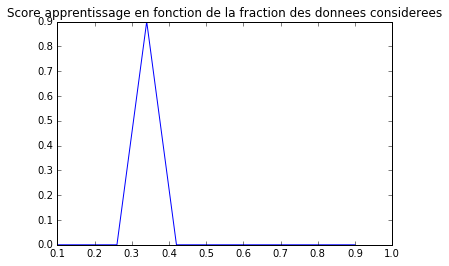

In [31]:
n=11
scores=np.zeros(n)
test_size=np.linspace(0.1,0.9,n)
for i in np.arange(n) :
    X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=test_size[i], random_state=0)
    indices = np.random.permutation(X.shape[0])
    train_idx, test_idx = indices[:X.shape[0]/2], indices[X.shape[0]/2:]
    X_train, X_test = X[train_idx,:], X[test_idx,:]
    y_train, y_test = y[train_idx], y[test_idx]
    images_train, images_test = images[train_idx,:,:,:], images[test_idx,:,:,:]
    
    Ctab = [10**i for i in range(-6,4) ]
    for C in Ctab:
        clf2 = SVC(kernel='linear', C=C)
        clf2 = clf.fit(X_train, y_train)
        scores[i] = clf2.score(X_test,y_test)
    
plt.plot(test_size,scores)
plt.title("Score apprentissage en fonction de la fraction des donnees considerees")

## Question 10

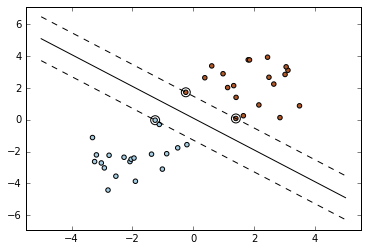

In [18]:
plt.close()

#we create 40 separable points
np.random.seed(3)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

# fit the model
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

plt.axis('tight')
plt.show()

In [26]:
#On veut des etiquettes -1,1
for i in range(0,40):
    if Y[i]==0:
        Y[i]=-1
        
primale = 0.5*(w[0]**2+w[1]**2)
print "fonctionelle primale %f"%(primale)

duale = primale
for i in range(0,clf.support_.shape[0]):
    duale = duale+clf.dual_coef_[0,i]*(1-Y[clf.support_[i]]*(np.dot(clf.coef_ , X[clf.support_[i]]) + clf.intercept_[0]))
print "fonctionelle dual %f"%duale

print "ecart=%f"%(np.abs(duale-(primale)))

fonctionelle primale 0.524063
fonctionelle dual 0.523903
ecart=0.000160
